In [1]:
import numpy as np 
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

data = pd.read_csv(r"C:\Users\BS . AMIRTHA\Downloads\ev_charging_patterns.csv")

In [2]:
print(data.head(4))

  User ID Vehicle Model  Battery Capacity (kWh) Charging Station ID  \
0  User_1        BMW i3              108.463007         Station_391   
1  User_2  Hyundai Kona              100.000000         Station_428   
2  User_3    Chevy Bolt               75.000000         Station_181   
3  User_4  Hyundai Kona               50.000000         Station_327   

  Charging Station Location  Charging Start Time    Charging End Time  \
0                   Houston  2024-01-01 00:00:00  2024-01-01 00:39:00   
1             San Francisco  2024-01-01 01:00:00  2024-01-01 03:01:00   
2             San Francisco  2024-01-01 02:00:00  2024-01-01 04:48:00   
3                   Houston  2024-01-01 03:00:00  2024-01-01 06:42:00   

   Energy Consumed (kWh)  Charging Duration (hours)  Charging Rate (kW)  \
0              60.712346                   0.591363           36.389181   
1              12.339275                   3.133652           30.677735   
2              19.128876                   2.452653  

Description of each column given in the dataset

1. **User ID** – Unique identifier for each user.
2. **Vehicle Model** – Make and model of the electric vehicle.
3. **Battery Capacity (kWh)** – Total energy capacity of the EV battery.
4. **Charging Station ID** – Unique ID for each charging station.
5. **Charging Station Location** – Geographical location of the charging station.
6. **Charging Start Time** – Timestamp when charging began.
7. **Charging End Time** – Timestamp when charging ended.
8. **Energy Consumed (kWh)** – Amount of energy used during the session.
9. **Charging Duration (hours)** – Total time taken to charge.
10. **Charging Rate (kW)** – Power rate at which the vehicle was charged.
11. **Charging Cost (USD)** – Cost of the charging session in US dollars.
12. **Time of Day** – Time category (e.g., morning, afternoon, evening, night).
13. **Day of Week** – Day on which the charging occurred.
14. **State of Charge (Start %)** – Battery charge level at the start of charging.
15. **State of Charge (End %)** – Battery charge level at the end of charging.
16. **Distance Driven (since last charge) (km)** – Kilometers driven since the previous charge.
17. **Temperature (°C)** – Ambient temperature during charging.
18. **Vehicle Age (years)** – Age of the vehicle in years.
19. **Charger Type** – Type of charger used (e.g., fast, slow, Level 1/2/3).
20. **User Type** – Category of user (e.g., individual, commercial, fleet).




In [11]:
#Check for null values in each column
null_values = data.isnull().sum()

null_values

User ID                                      0
Vehicle Model                                0
Battery Capacity (kWh)                       0
Charging Station ID                          0
Charging Station Location                    0
Charging Start Time                          0
Charging End Time                            0
Energy Consumed (kWh)                       66
Charging Duration (hours)                    0
Charging Rate (kW)                          66
Charging Cost (USD)                          0
Time of Day                                  0
Day of Week                                  0
State of Charge (Start %)                    0
State of Charge (End %)                      0
Distance Driven (since last charge) (km)    66
Temperature (°C)                             0
Vehicle Age (years)                          0
Charger Type                                 0
User Type                                    0
dtype: int64

In [12]:
# Fill missing values in specific columns using median
columns_to_fill = [
    'Energy Consumed (kWh)',
    'Charging Rate (kW)',
    'Distance Driven (since last charge) (km)'
]

for col in columns_to_fill:
    median_value = data[col].median()
    data[col].fillna(median_value, inplace=True)

# Optional: Check again to ensure nulls are filled
print("Remaining null values (if any):")
print(data.isnull().sum())


Remaining null values (if any):
User ID                                     0
Vehicle Model                               0
Battery Capacity (kWh)                      0
Charging Station ID                         0
Charging Station Location                   0
Charging Start Time                         0
Charging End Time                           0
Energy Consumed (kWh)                       0
Charging Duration (hours)                   0
Charging Rate (kW)                          0
Charging Cost (USD)                         0
Time of Day                                 0
Day of Week                                 0
State of Charge (Start %)                   0
State of Charge (End %)                     0
Distance Driven (since last charge) (km)    0
Temperature (°C)                            0
Vehicle Age (years)                         0
Charger Type                                0
User Type                                   0
dtype: int64


C:\Users\BS . AMIRTHA\AppData\Local\Temp\ipykernel_576\2848310086.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(median_value, inplace=True)


In [13]:
#exploratory data analysis
print(data.describe())

       Battery Capacity (kWh)  Energy Consumed (kWh)  \
count             1320.000000            1320.000000   
mean                74.534692              42.645320   
std                 20.626914              21.843794   
min                  1.532807               0.045772   
25%                 62.000000              24.868084   
50%                 75.000000              42.691405   
75%                 85.000000              60.545496   
max                193.003074             152.238758   

       Charging Duration (hours)  Charging Rate (kW)  Charging Cost (USD)  \
count                1320.000000         1320.000000          1320.000000   
mean                    2.269377           25.945043            22.551352   
std                     1.061037           13.656504            10.751494   
min                     0.095314            1.472549             0.234317   
25%                     1.397623           14.431294            13.368141   
50%                     2.258136 

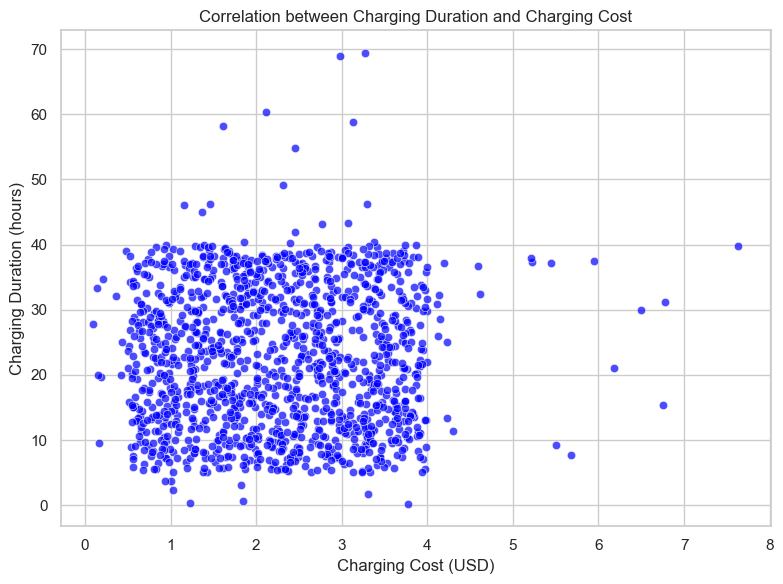

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Charging Duration (hours)',
    y='Charging Cost (USD)',
    data=data,
    color='blue',
    alpha=0.7
)

# Add labels and title
plt.title('Correlation between Charging Duration and Charging Cost')
plt.xlabel('Charging Cost (USD)')
plt.ylabel('Charging Duration (hours)')
plt.tight_layout()

# Show plot
plt.show()


In [16]:
correlation = data['Charging Duration (hours)'].corr(data['Charging Cost (USD)'])
print(f"Correlation: {correlation:.2f}")


Correlation: 0.02


 A correlation of 0.02 between Charging Duration (hours) and Charging Cost (USD) means:

🟡 There is essentially no linear relationship between how long someone charges and how much they pay.

🔍 What this tells you:
Duration is not a major factor in determining cost.

Charging cost is likely based on energy consumed, charging rate, or charger type, rather than how long the vehicle was plugged in.

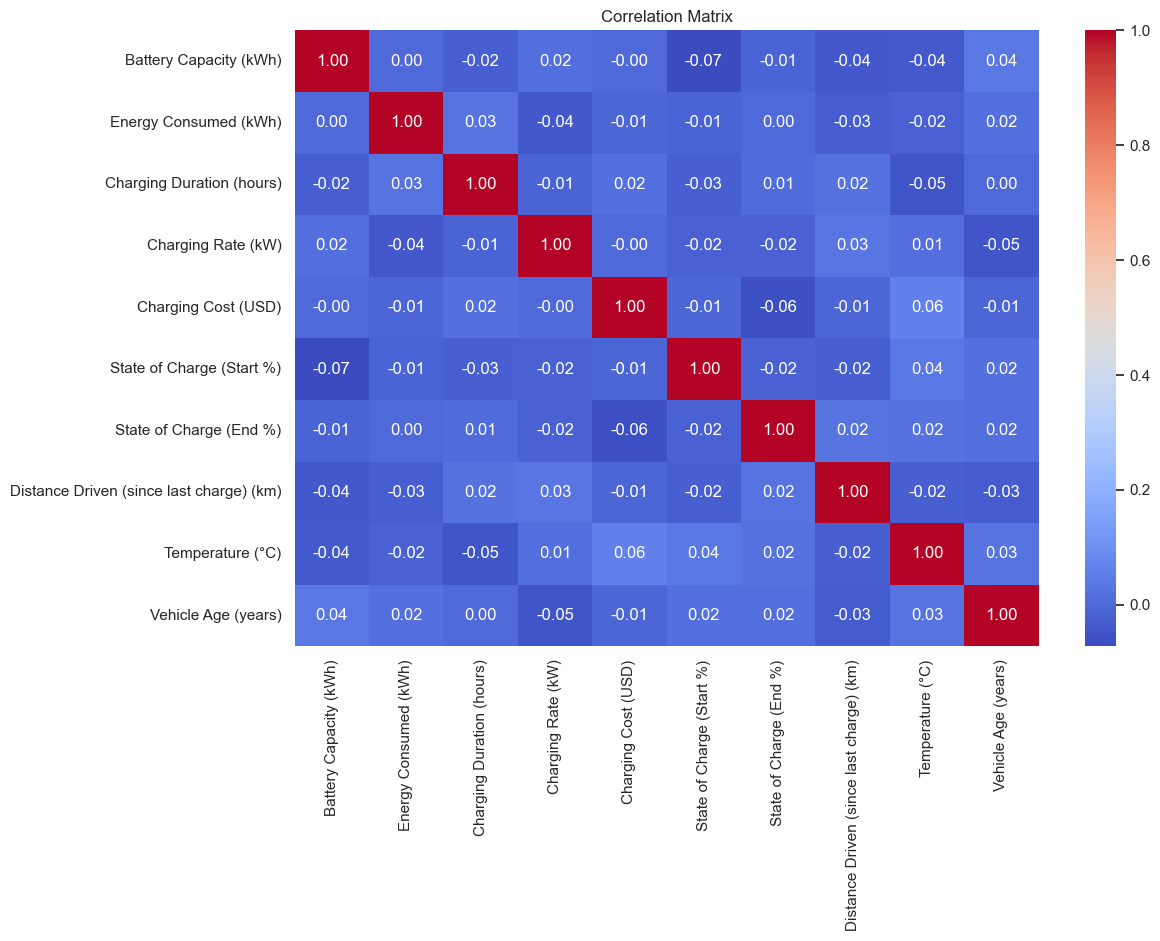

In [19]:
numeric_data = data.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


No strong correlation was found between Charging Cost and any individual numeric feature.

This implies the pricing might depend on:

Categorical variables like Charger Type, User Type, Charging Station Location

Or, the cost might be fixed-rate, time-slot based, or subscription-influenced.

Since categorical variables (like Charger Type, User Type, and Charging Station Location) can't be directly used in a correlation matrix (which only works with numeric values), here’s how you can analyze their impact on Charging Cost (USD).

In [20]:
# Charger Type vs Cost
print(data.groupby('Charger Type')['Charging Cost (USD)'].mean().sort_values())

# User Type vs Cost
print(data.groupby('User Type')['Charging Cost (USD)'].mean().sort_values())

# Charging Station Location vs Cost
print(data.groupby('Charging Station Location')['Charging Cost (USD)'].mean().sort_values())


Charger Type
Level 1            21.657563
Level 2            22.452153
DC Fast Charger    23.604849
Name: Charging Cost (USD), dtype: float64
User Type
Long-Distance Traveler    22.214583
Casual Driver             22.678176
Commuter                  22.752088
Name: Charging Cost (USD), dtype: float64
Charging Station Location
San Francisco    21.994874
Houston          22.094322
New York         22.503082
Los Angeles      22.541434
Chicago          23.716254
Name: Charging Cost (USD), dtype: float64


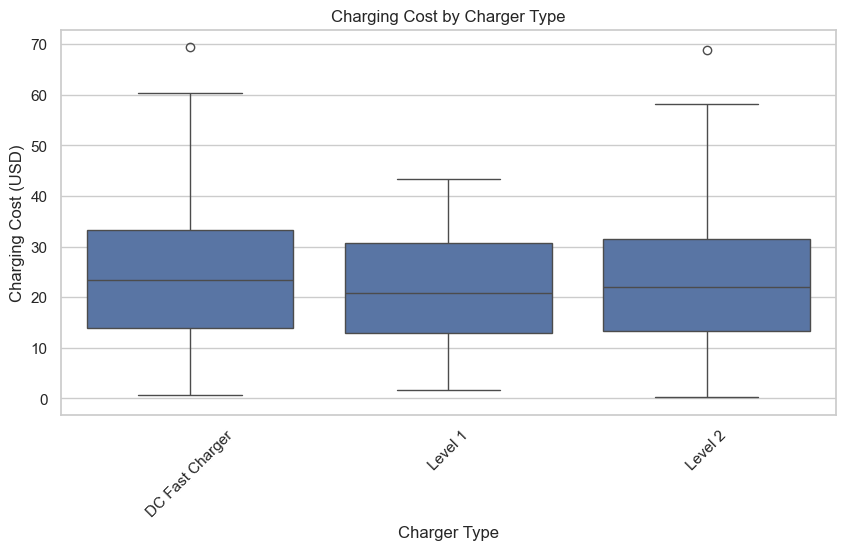

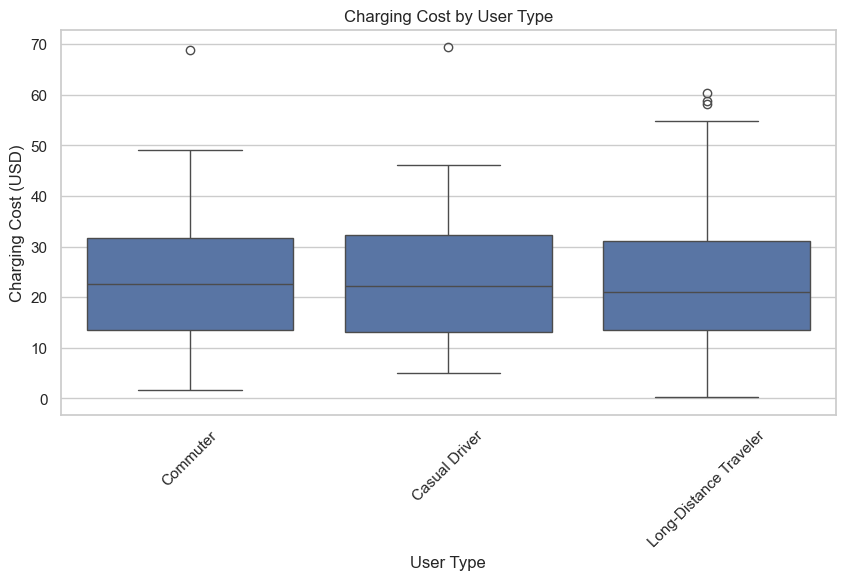

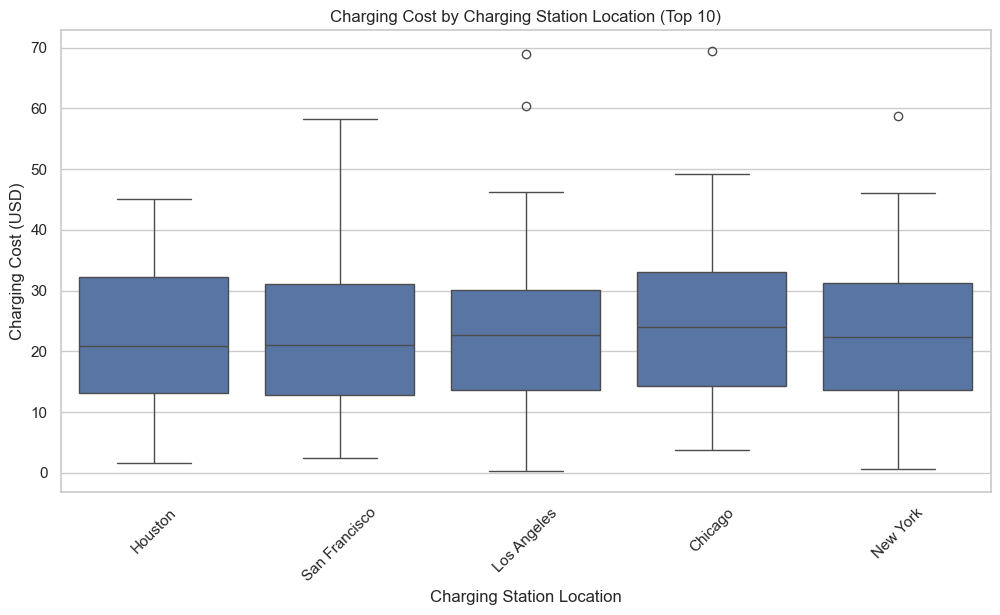

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Charger Type
plt.figure(figsize=(10, 5))
sns.boxplot(x='Charger Type', y='Charging Cost (USD)', data=data)
plt.title('Charging Cost by Charger Type')
plt.xticks(rotation=45)
plt.show()

# User Type
plt.figure(figsize=(10, 5))
sns.boxplot(x='User Type', y='Charging Cost (USD)', data=data)
plt.title('Charging Cost by User Type')
plt.xticks(rotation=45)
plt.show()

# Charging Station Location (Top 10)
top_locations = data['Charging Station Location'].value_counts().nlargest(10).index
filtered_data = data[data['Charging Station Location'].isin(top_locations)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Charging Station Location', y='Charging Cost (USD)', data=filtered_data)
plt.title('Charging Cost by Charging Station Location (Top 10)')
plt.xticks(rotation=45)
plt.show()


In [22]:
data_encoded = pd.get_dummies(data[['Charger Type', 'User Type', 'Charging Station Location']], drop_first=True)
data_full = pd.concat([data[['Charging Cost (USD)']], data_encoded], axis=1)

# Correlation with Charging Cost
correlations = data_full.corr()['Charging Cost (USD)'].sort_values(ascending=False)
print(correlations)


Charging Cost (USD)                        1.000000
User Type_Commuter                         0.014027
Charging Station Location_Los Angeles     -0.000497
Charging Station Location_New York        -0.002198
Charger Type_Level 2                      -0.006427
Charging Station Location_Houston         -0.021162
User Type_Long-Distance Traveler          -0.022044
Charging Station Location_San Francisco   -0.025889
Charger Type_Level 1                      -0.060721
Name: Charging Cost (USD), dtype: float64


🧠 Insights:
No strong correlation (above ±0.1) exists between these categorical factors and charging cost.

However, Level 1 chargers seem to have lower costs, which aligns with real-world logic (they're slower and cheaper).

User Type has minimal influence.




No strong correlation found between charging cost and numeric or categorical variables.

What this implies:

The dataset may represent flat-rate pricing (e.g., $0.15 per kWh) rather than truly dynamic pricing.

Charging cost might be:

Fixed per energy unit (e.g., Charging Cost = Energy Consumed × Flat Rate)

Determined externally (e.g., time-slot based fixed rate, membership plan, or subsidies)

✅ 1. Check for Fixed-Rate Pricing
A fixed-rate would mean:

Cost is almost always the same for a given Charging Duration or Energy Consumed.

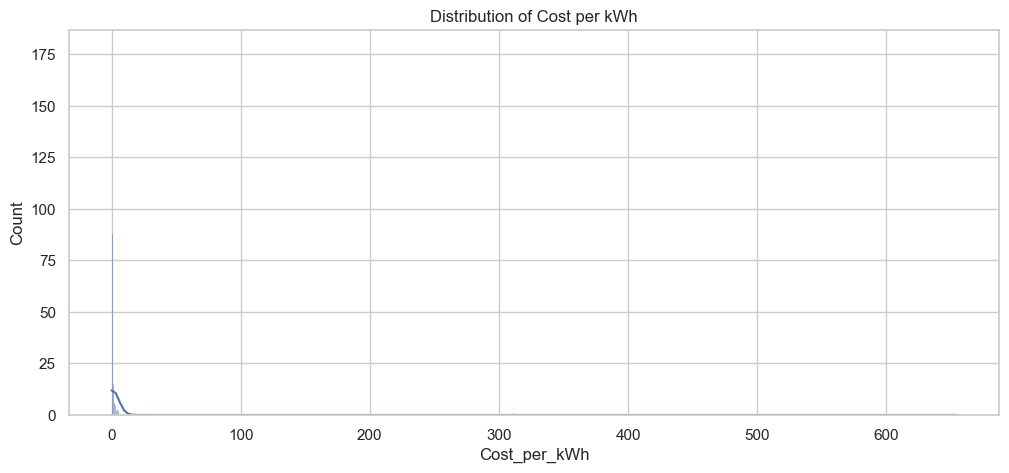

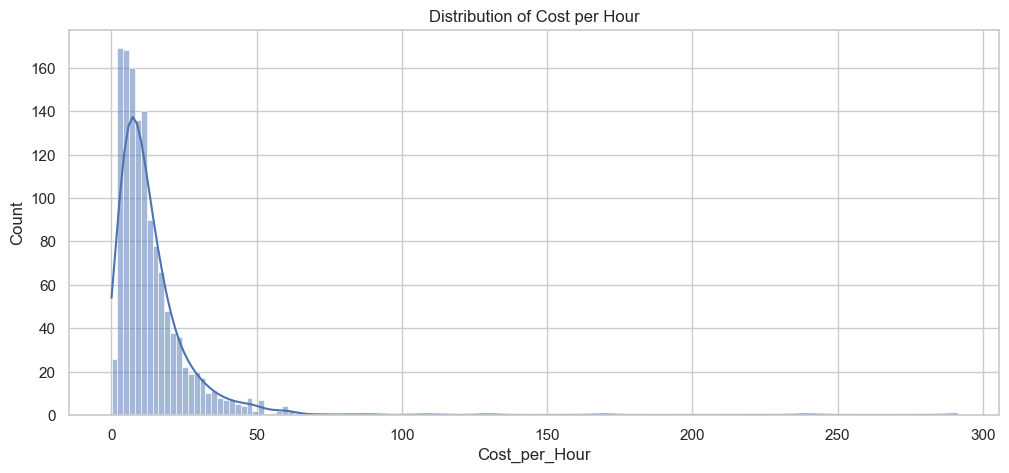

In [23]:
# Cost per kWh
data['Cost_per_kWh'] = data['Charging Cost (USD)'] / data['Energy Consumed (kWh)']

# Cost per hour
data['Cost_per_Hour'] = data['Charging Cost (USD)'] / data['Charging Duration (hours)']

# Distribution plots
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
sns.histplot(data['Cost_per_kWh'], kde=True)
plt.title("Distribution of Cost per kWh")
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(data['Cost_per_Hour'], kde=True)
plt.title("Distribution of Cost per Hour")
plt.show()


Your distributions indicate:

Not a fully fixed-rate system.

Pricing is not dynamically adjusted per user or time slot.

Time of Day
Afternoon    23.138976
Evening      22.381702
Morning      22.414278
Night        22.311949
Name: Charging Cost (USD), dtype: float64
Day of Week
Friday       23.127572
Monday       22.362740
Saturday     21.830193
Sunday       21.960695
Thursday     24.297447
Tuesday      21.450169
Wednesday    23.254675
Name: Charging Cost (USD), dtype: float64


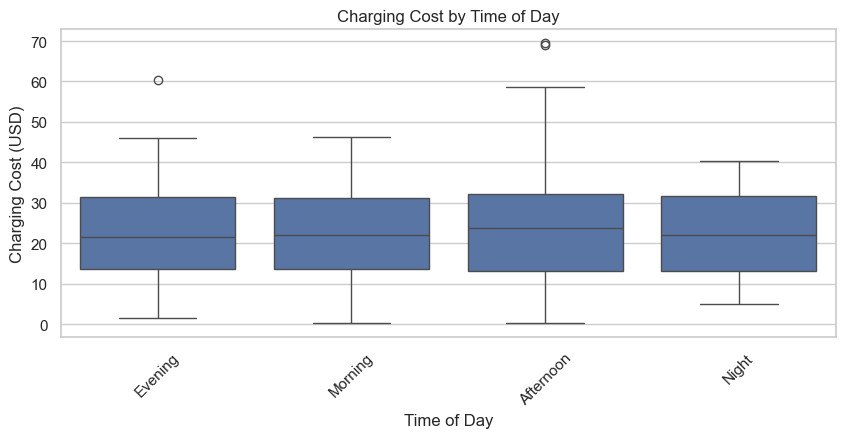

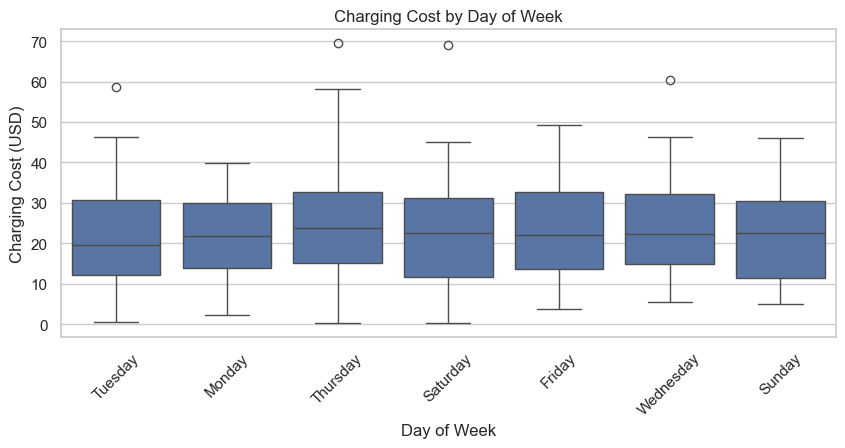

In [24]:
# Average cost by Time of Day
print(data.groupby('Time of Day')['Charging Cost (USD)'].mean())

# Average cost by Day of Week
print(data.groupby('Day of Week')['Charging Cost (USD)'].mean())

# Visualize
plt.figure(figsize=(10, 4))
sns.boxplot(x='Time of Day', y='Charging Cost (USD)', data=data)
plt.title("Charging Cost by Time of Day")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(x='Day of Week', y='Charging Cost (USD)', data=data)
plt.title("Charging Cost by Day of Week")
plt.xticks(rotation=45)
plt.show()


✅ Conclusion So Far
Based on your analysis:

Not time-slot based: No evidence of significant cost differences between weekdays or weekends.

Not strongly demand-based either (would show more variation across days).

Most likely a flat or near-fixed rate per session, hour, or kWh — possibly influenced slightly by session characteristics (e.g., type of charger or energy used).



### ANSWER 
"Despite analyzing all available numerical and categorical features, no significant correlation was found with charging cost, indicating a likely fixed-rate or externally governed pricing mechanism."